In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#uploading the data set
df=pd.read_csv('C:/Users/Sachin Kamath/Downloads/CAR DETAILS.csv')

In [3]:
#Basic Data Summary

# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display the column names
print("Columns:", df.columns)

# Display the first few rows of the dataset
print("Head:\n", df.head())

# Display the summary statistics of the dataset
print("Summary Statistics:\n", df.describe())

Shape of the dataset: (4340, 8)
Columns: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')
Head:
 

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
Summary Statistics:
               year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000


In [4]:
# Null Value Analysis 

# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Sort columns based on the number of missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing value information
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

# Display the missing value information
print("Missing Values:\n", missing_data)

Missing Values:
 Empty DataFrame
Columns: [Missing Values, Missing Percentage]
Index: []


In [5]:
#There are no missing values 

In [6]:
# Assuming 'df' is your DataFrame, and 'feature' is the column to be checked for outliers
feature = 'selling_price'
z_threshold = 3  # Threshold for considering a data point as an outlier (commonly set to ±3)

z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())
outliers_z = df[z_scores > z_threshold]

print("Outliers detected using Z-Score method:")
print(outliers_z)


Outliers detected using Z-Score method:
                                                   name  year  selling_price  \
89    Mercedes-Benz S-Class S 350d Connoisseurs Edition  2017        8150000   
96                                      Audi A8 4.2 TDI  2013        2800000   
101          Mercedes-Benz E-Class Exclusive E 200 BSIV  2018        4500000   
102                             BMW X1 sDrive 20d xLine  2017        2750000   
105                                  BMW 7 Series 730Ld  2012        2500000   
...                                                 ...   ...            ...   
4047                    Volvo XC 90 D5 Inscription BSIV  2017        4500000   
4186                    Toyota Fortuner 2.8 4WD AT BSIV  2017        2750000   
4224                         Toyota Fortuner 2.7 2WD AT  2016        2500000   
4304                 Audi Q5 3.0 TDI Quattro Technology  2018        3899000   
4313                 Ford Endeavour 2.2 Titanium AT 4X2  2019        2800000   


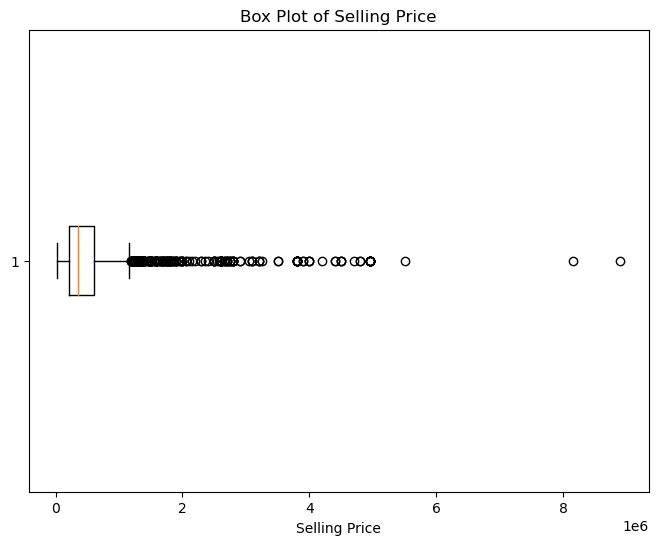

In [7]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Let's create a box plot for the 'selling_price' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['selling_price'], vert=False)
plt.xlabel('Selling Price')
plt.title('Box Plot of Selling Price')
plt.show()


In [8]:
#Removing outliers 
#Removing Odd ones out

# Assuming 'df' is your DataFrame, and 'selling_price' is the column with potential outliers
selling_price = 'selling_price'

Q1 = df[selling_price].quantile(0.25)
Q3 = df[selling_price].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with selling_price values outside the IQR boundaries
df = df[(df[selling_price] >= lower_bound) & (df[selling_price] <= upper_bound)]


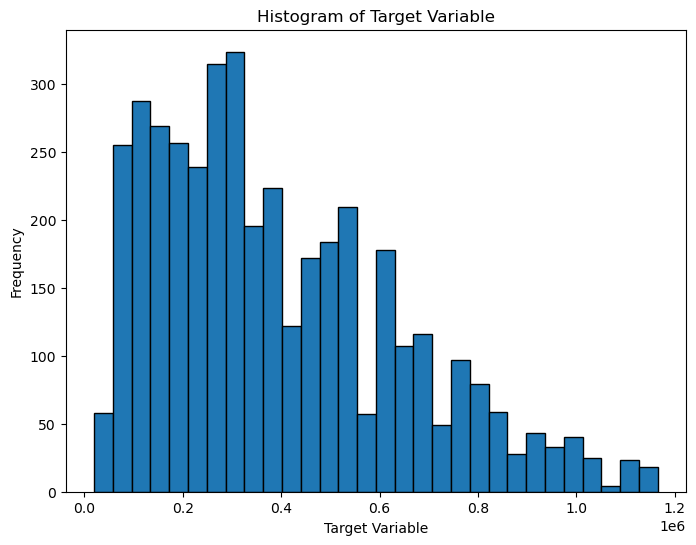

In [9]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame, and 'target' is the column representing the target variable
target = 'selling_price'

# Plot histogram to visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
plt.hist(df[target], bins=30, edgecolor='black')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')
plt.show()


In [10]:
#treating the right skewed data
# Apply square root transformation
df['sqrt_target'] = np.sqrt(df[target])


In [11]:
from scipy.stats import boxcox

# Perform Box-Cox transformation and find the optimal lambda parameter
transformed_target, lambda_param = boxcox(df[selling_price])

# Save the transformed target in the DataFrame
df['boxcox_target'] = transformed_target


In [12]:
# List of columns to one-hot encode
columns_to_encode = ['name', 'fuel', 'seller_type', 'transmission', 'owner']

# Perform one-hot encoding on the specified columns 
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)

# Display the updated DataFrame with one-hot encoded columns
print(df_encoded.head())

   year  selling_price  km_driven  sqrt_target  boxcox_target  \
0  2007          60000      70000   244.948974      94.610716   
1  2007         135000      50000   367.423461     122.591703   
2  2012         600000     100000   774.596669     196.614156   
3  2017         250000      46000   500.000000     149.090906   
4  2014         450000     141000   670.820393     179.554129   

   name_Ambassador CLASSIC 1500 DSL AC  name_Ambassador Classic 2000 Dsz  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   name_Ambassador Grand 1800 ISZ MPFI PW CL  \
0                                          0   
1                                          0   
2       

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selecting the numerical features you want to scale
numerical_features = ['selling_price', 'km_driven']

# Extract the numerical features from the DataFrame
X = df[numerical_features]

# Initialize the scaler objects
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Perform standardization (Z-score normalization) on the numerical features
X_standardized = standard_scaler.fit_transform(X)




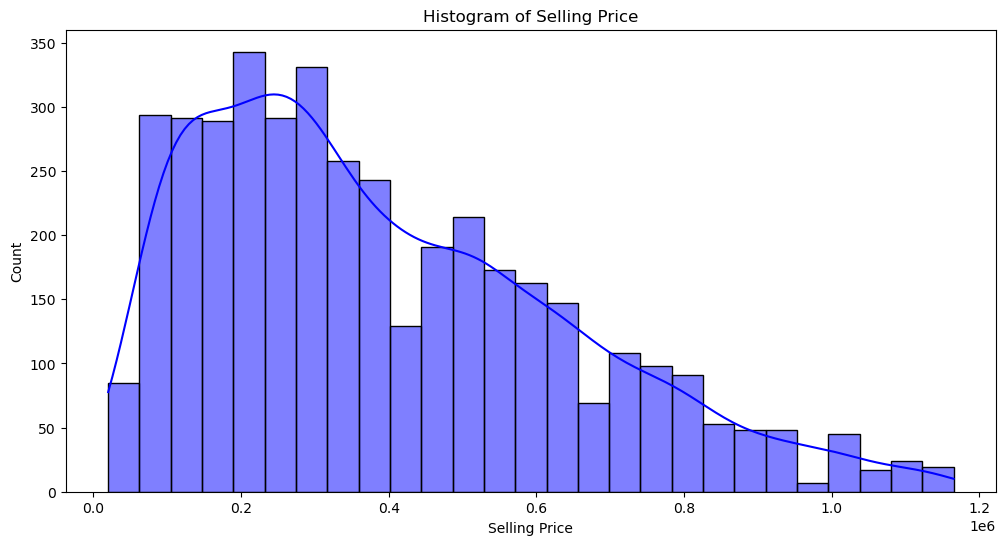

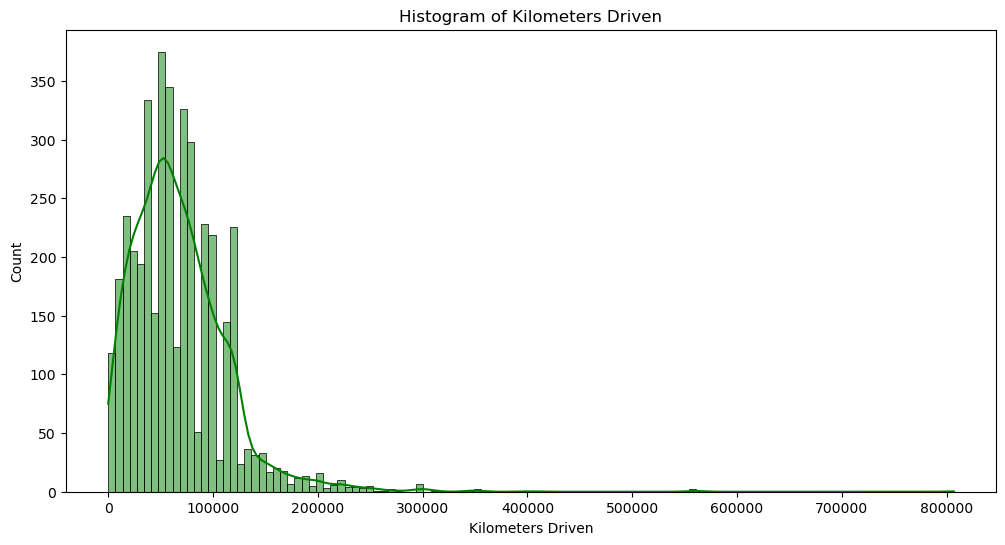

In [14]:
# Histograms of numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(df['selling_price'], kde=True, color='blue')
plt.xlabel('Selling Price')
plt.title('Histogram of Selling Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['km_driven'], kde=True, color='green')
plt.xlabel('Kilometers Driven')
plt.title('Histogram of Kilometers Driven')
plt.show()




In [15]:
#The histogram of selling_price shows a right-skewed distribution, 
#indicating that the majority of the vehicles have lower selling prices, while a few have higher prices.

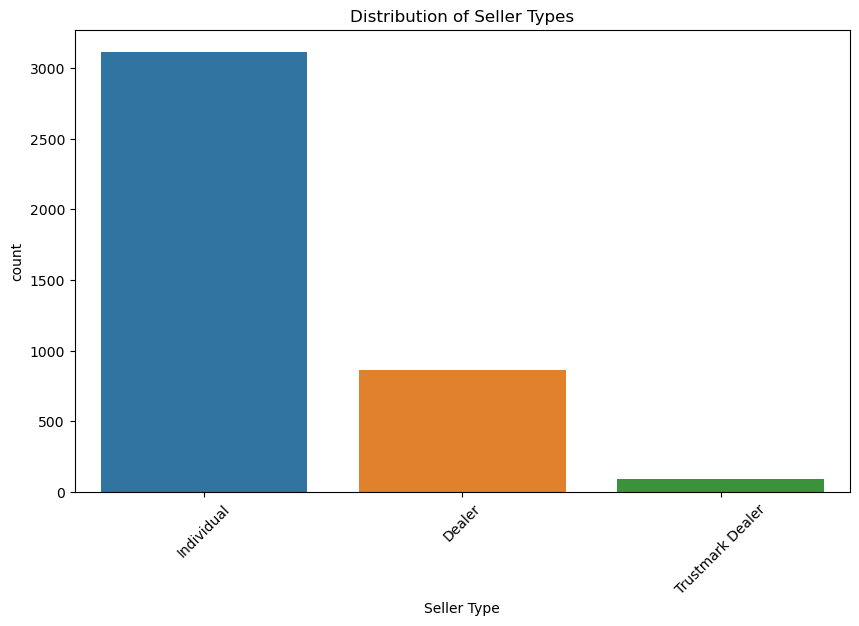

In [16]:
## Bar charts of Seller Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='seller_type')
plt.xticks(rotation=45)
plt.xlabel('Seller Type')
plt.title('Distribution of Seller Types')
plt.show()





In [17]:
# The bar charts of seller_type reveal the distribution of different fuel types and seller types in the dataset, 
# which can provide insights into market trends and preferences.

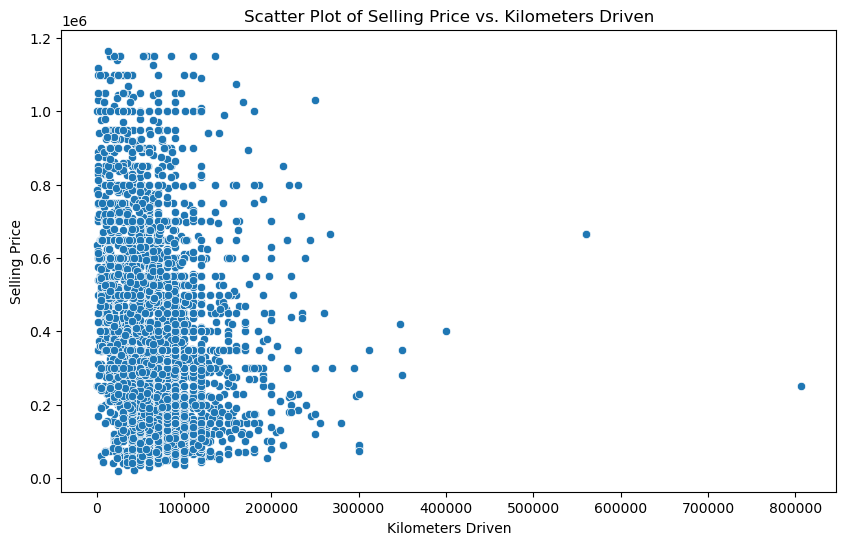

In [18]:
# Scatter plot of selling_price vs. km_driven
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='km_driven', y='selling_price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Selling Price vs. Kilometers Driven')
plt.show()

In [19]:
#The scatter plot of selling_price vs. km_driven shows the relationship between the two variables, 
#and using color to distinguish fuel types can highlight any patterns or clusters.

# We see that as the selling price increases the kilometers driven is less, 
# So people tend to buy luxury cars not to go on long jouneys rather on short trips


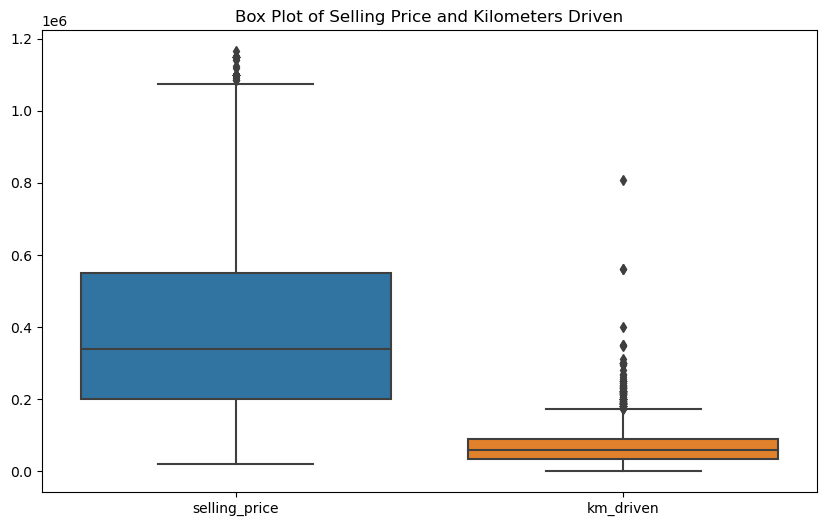

In [20]:
# Box plot of selling_price and km_driven
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded[['selling_price', 'km_driven']])
plt.title('Box Plot of Selling Price and Kilometers Driven')
plt.show()

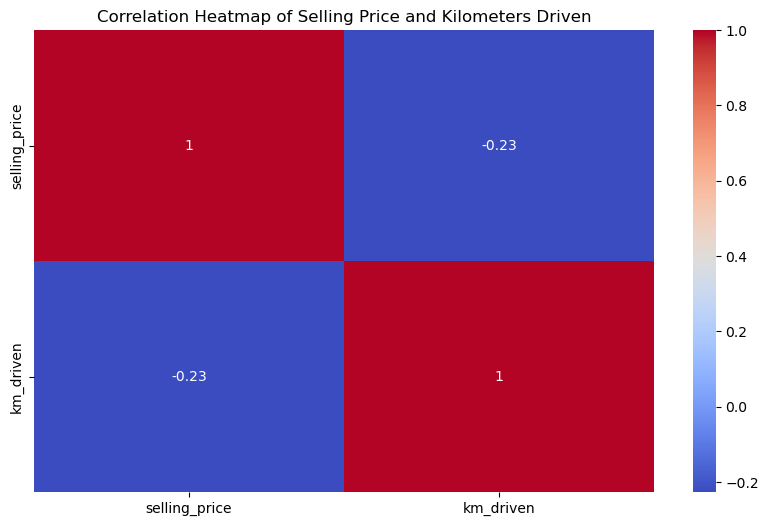

In [21]:
# Heatmap of numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded[['selling_price', 'km_driven']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selling Price and Kilometers Driven')
plt.show()

In [22]:
#Correlation Sign: The negative value of -0.23 indicates that there is a weak negative correlation between selling_price and km_driven. 
# This means that as the number of kilometers driven increases, the selling price tends to decrease slightly.

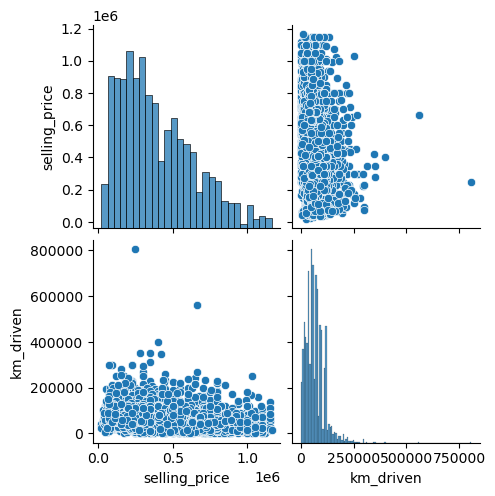

In [23]:
# Pair plot of numerical variables
sns.pairplot(df_encoded[['selling_price', 'km_driven']])
plt.show()

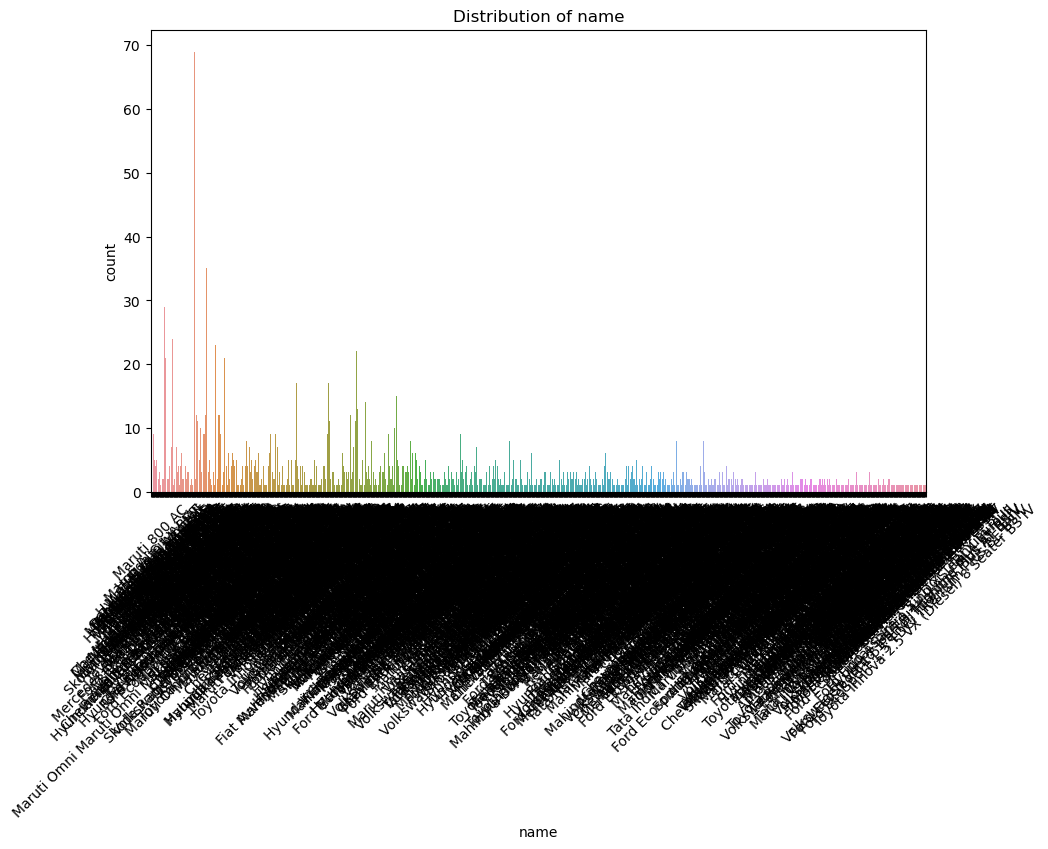

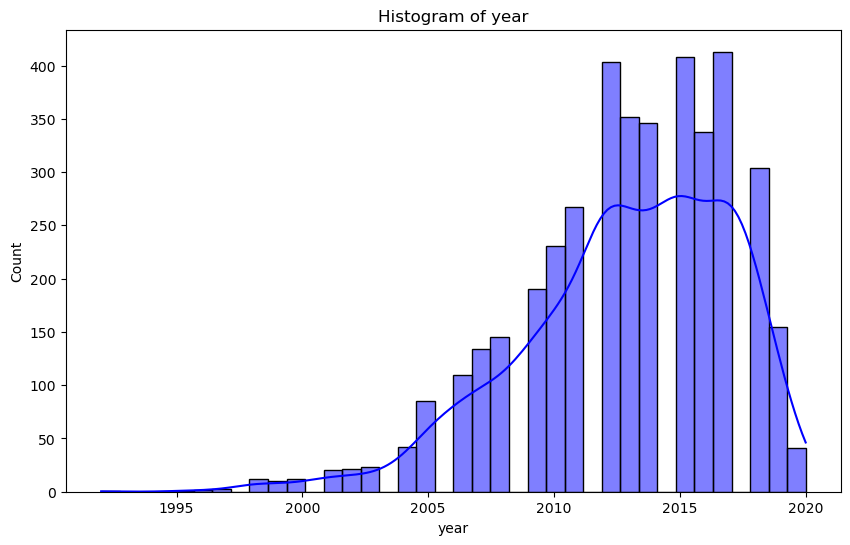

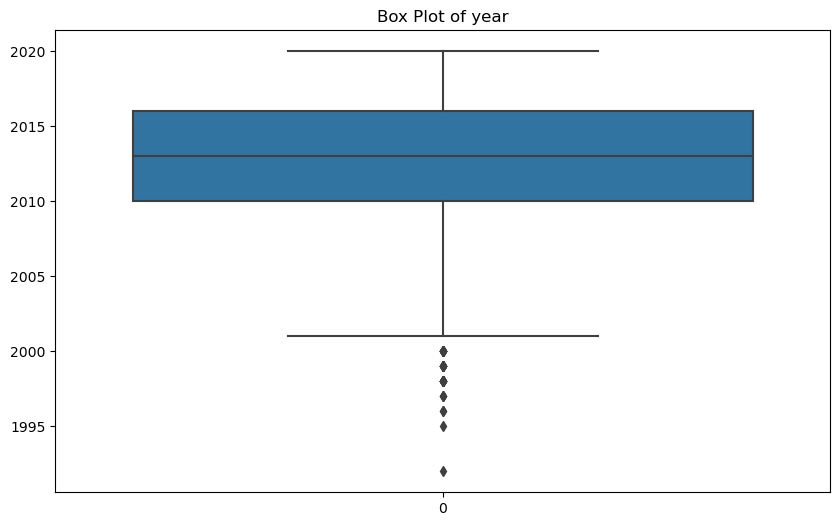

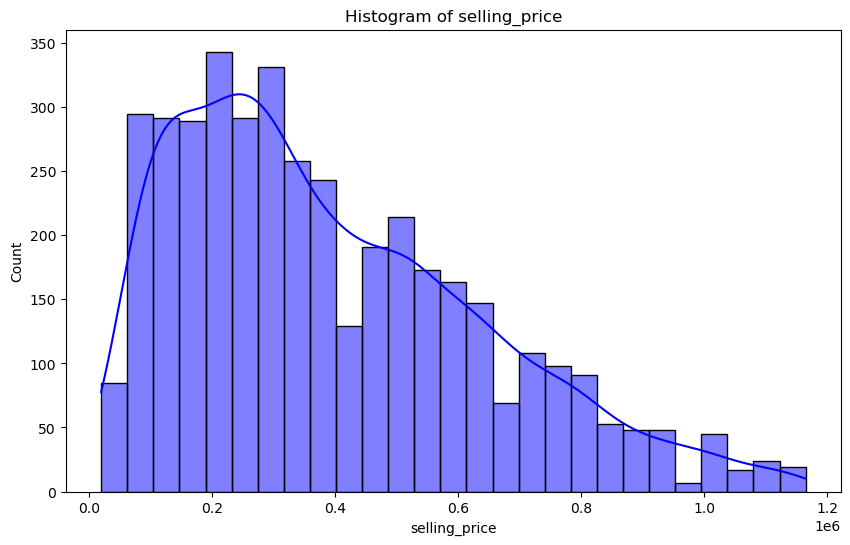

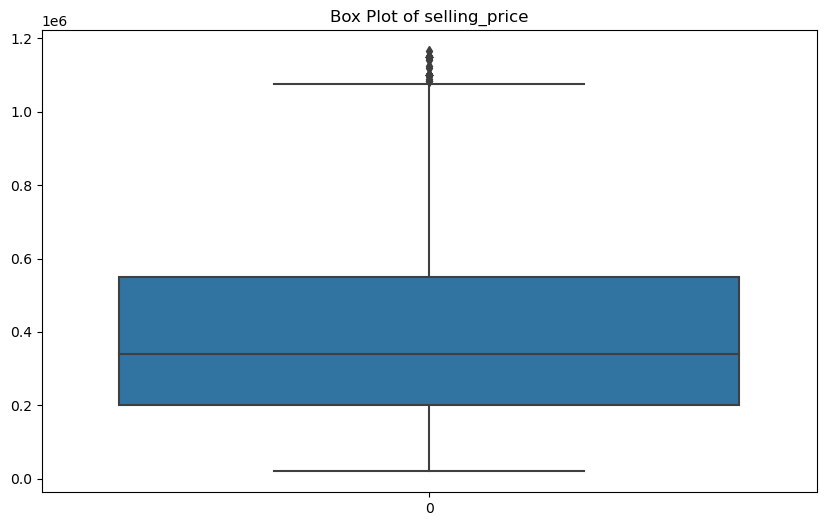

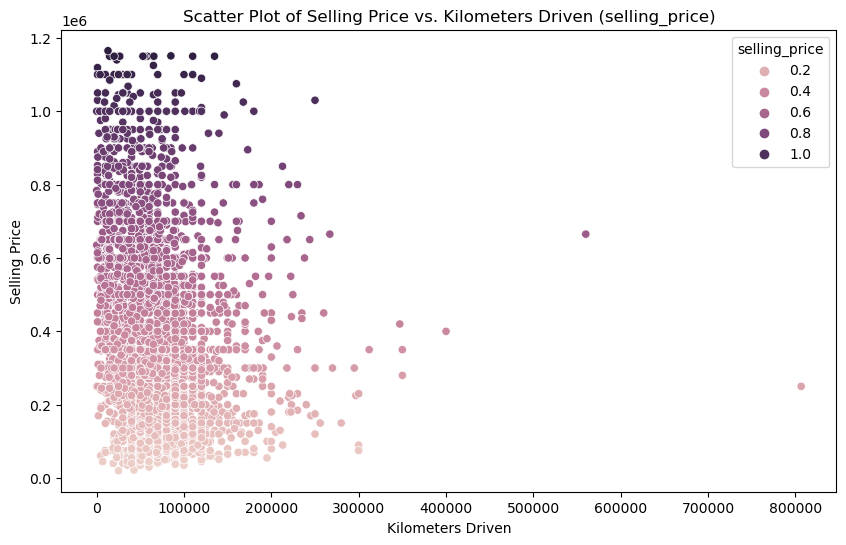

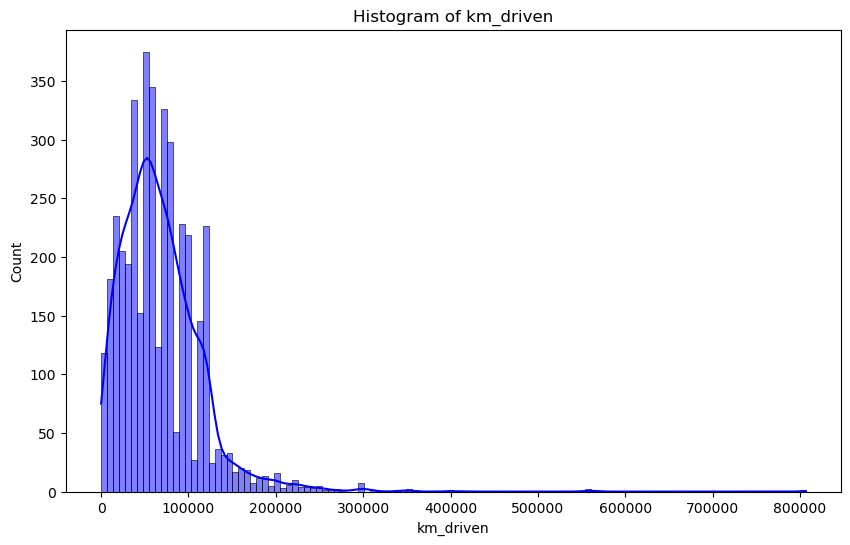

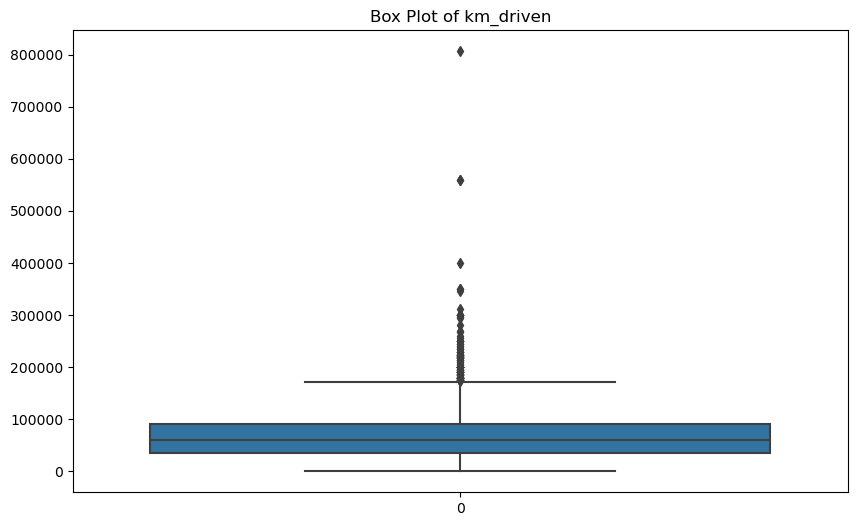

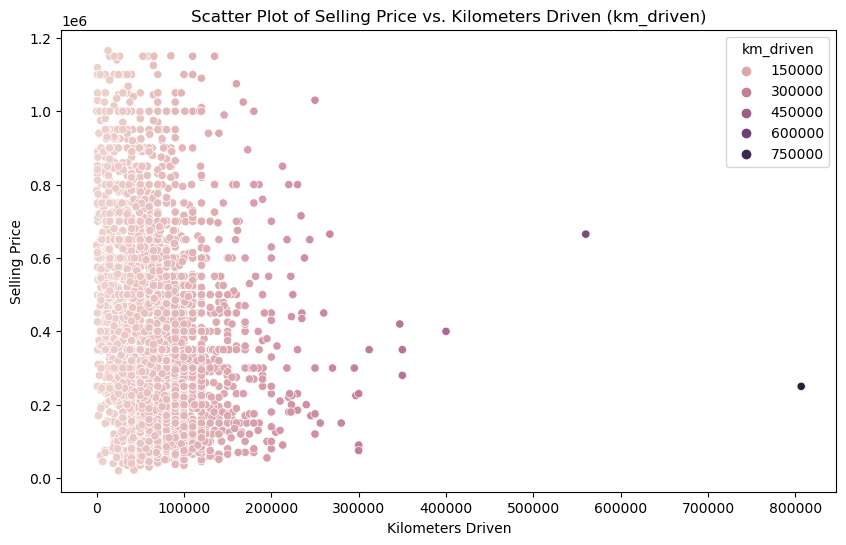

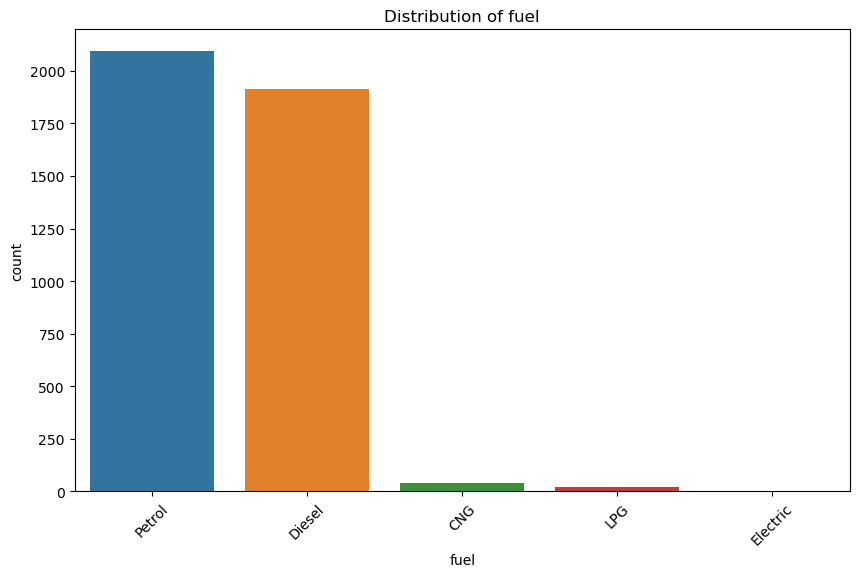

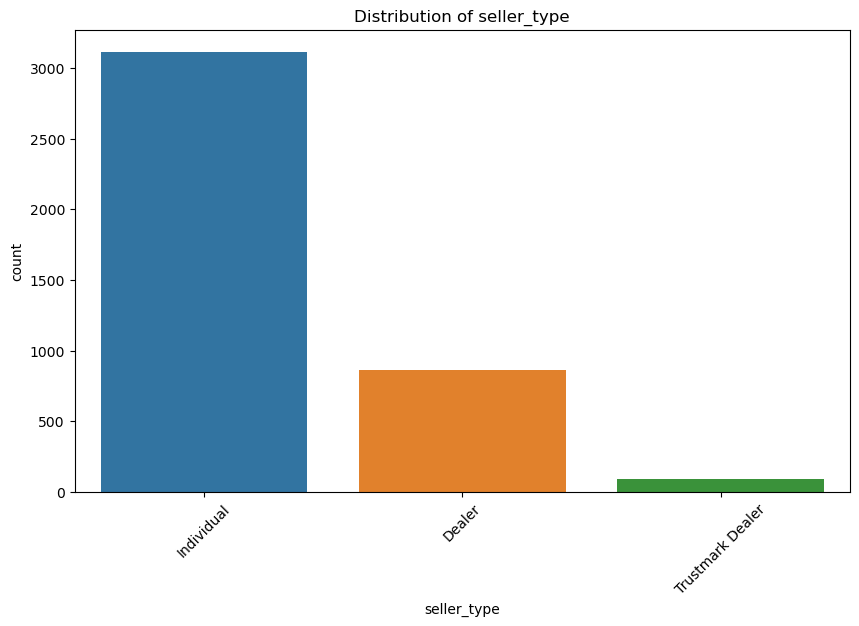

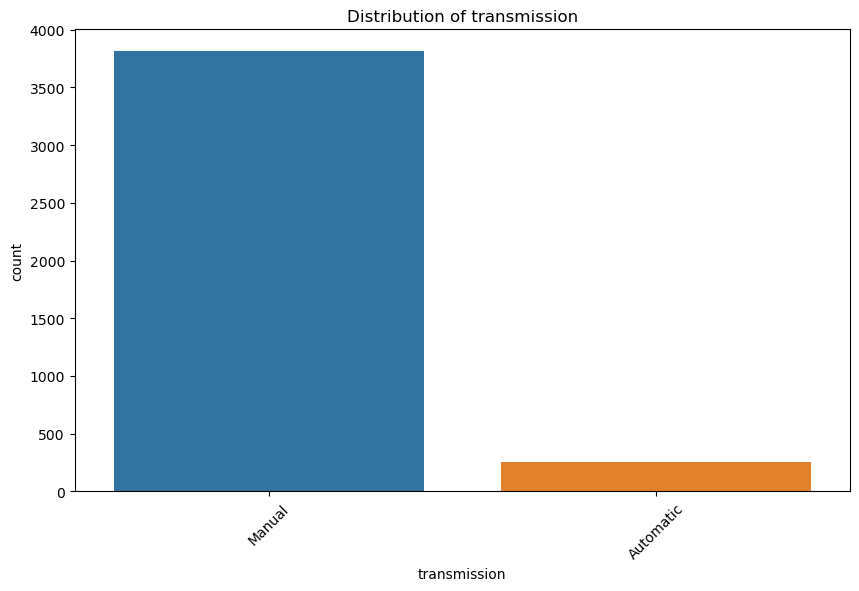

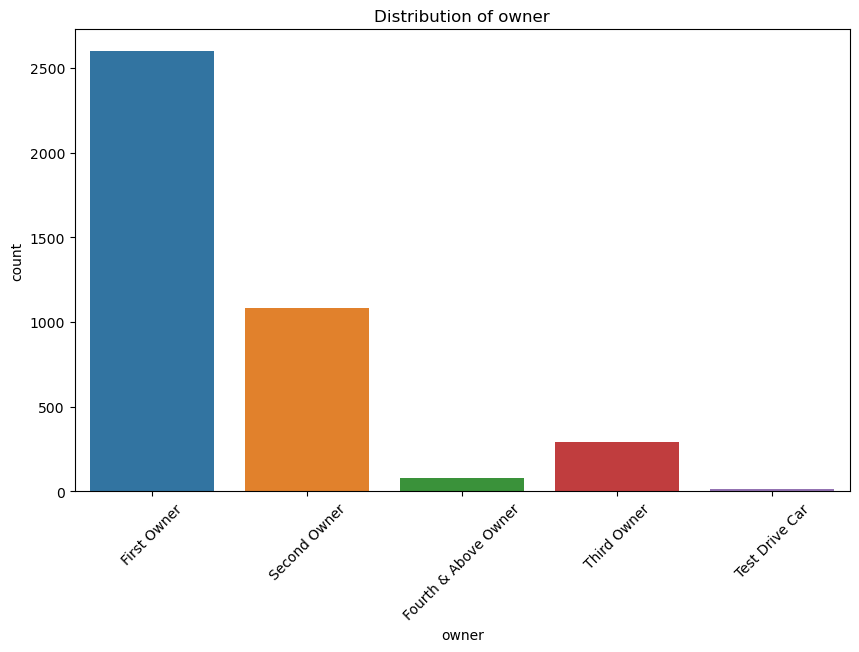

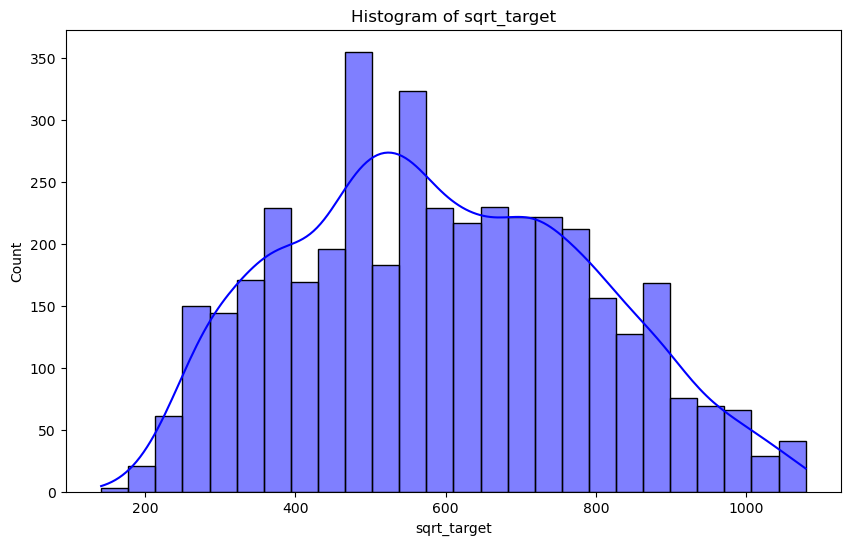

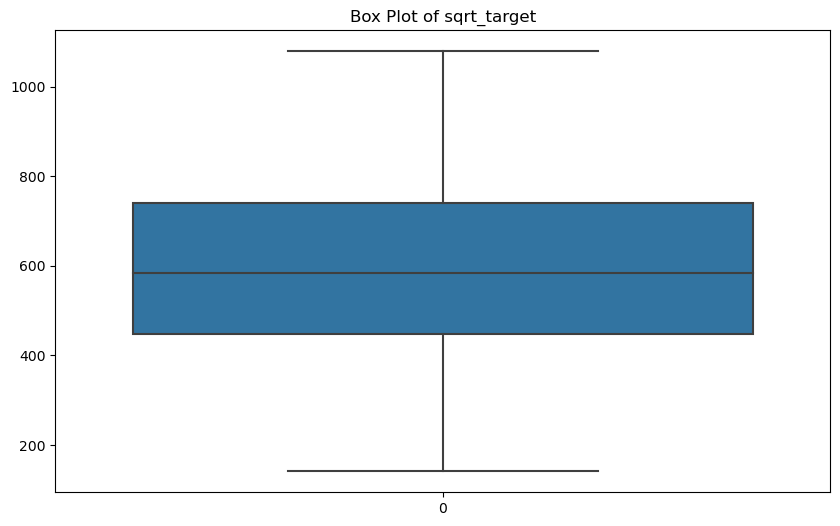

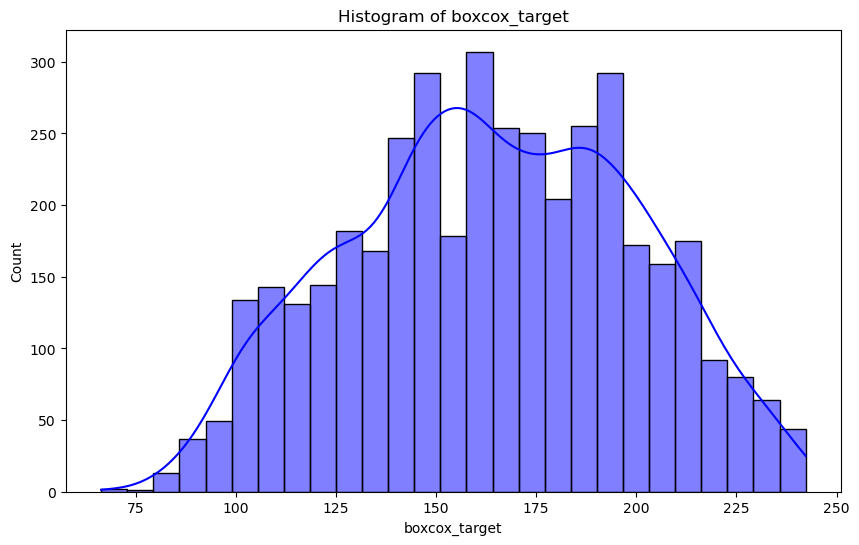

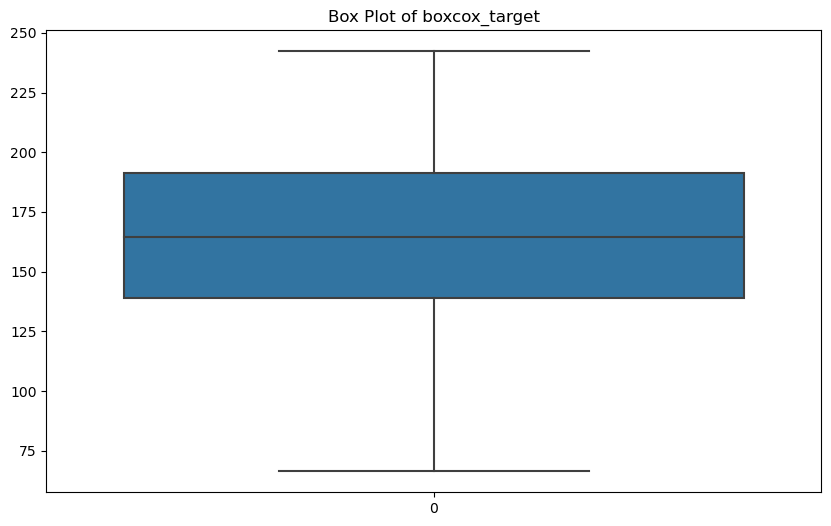

In [25]:
#Columnwise representation of every column 


# Loop through each column in the DataFrame
for column in df.columns:
    # Check the data type of the column
    data_type = df[column].dtype
    
    # For numerical columns, create histograms and box plots
    if data_type in ['int64', 'float64']:
        # Create histogram
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True, color='blue')
        plt.xlabel(column)
        plt.title(f'Histogram of {column}')
        plt.show()

        # Create box plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[column])
        plt.title(f'Box Plot of {column}')
        plt.show()

        # For 'selling_price' and 'km_driven', create scatter plot against each other
        if column in ['selling_price', 'km_driven']:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df, x='km_driven', y='selling_price', hue=column)
            plt.xlabel('Kilometers Driven')
            plt.ylabel('Selling Price')
            plt.title(f'Scatter Plot of Selling Price vs. Kilometers Driven ({column})')
            plt.show()
    
    # For categorical columns, create bar charts
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column)
        plt.xticks(rotation=45)
        plt.xlabel(column)
        plt.title(f'Distribution of {column}')
        plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Splitting data into Features (X) and Target Variable (y)
X = df_encoded.drop('selling_price', axis=1)  # Features (all columns except 'selling_price')
y = df_encoded['selling_price']              # Target variable

# Step 2: Splitting data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scaling Numerical Features (using Standardization)
numerical_features = ['km_driven']  # Add other numerical features if needed

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform the scaler on the testing set using the same parameters as the training set
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 2. Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 3. Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# 4. Bagging with Decision Trees
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}")

evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting Regression")
evaluate_model(y_test, y_pred_bagging, "Bagging with Decision Trees")


C:\Users\Sachin Kamath\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Linear Regression - Mean Squared Error: 977110290615972021665792.00, R-squared: -16864870240487.40
Random Forest Regression - Mean Squared Error: 1172152.60, R-squared: 1.00
Gradient Boosting Regression - Mean Squared Error: 2466203.69, R-squared: 1.00
Bagging with Decision Trees - Mean Squared Error: 1387837.21, R-squared: 1.00


In [ ]:
import joblib

# Assuming 'rf_regression_model' is your trained Random Forest Regression model

# Save the model to a file
filename = 'C:/Users/Sachin Kamath/Downloads/random_forest_regression_model.pkl'
joblib.dump(rf_model, filename)

print("Model saved successfully.")


Model saved successfully.


In [ ]:
# Load the saved model
loaded_model = joblib.load(filename)

# Now we can use 'loaded_model' to make predictions


In [ ]:
# Load the original CAR details dataset
original_data = pd.read_csv('C:/Users/Sachin Kamath/Downloads/CAR DETAILS.csv')



In [ ]:
# Randomly select 20 data points
random_sample = df_encoded.sample(n=20, random_state=42)

random_sample

year  selling_price  km_driven  name_Ambassador CLASSIC 1500 DSL AC  \
3978  2010         165000      80000                                    0   
1448  2019         250000      27000                                    0   
2664  2008         120000      41723                                    0   
17    2014         450000     141000                                    0   
1634  2016         730000      60000                                    0   
881   2012         155000      19077                                    0   
134   2015         530000      14272                                    0   
2338  2013          92800      25000                                    0   
1992  2016         284000      40000                                    0   
2886  2012         260000      42000                                    0   
3827  2015         511000      58000                                    0   
2704  2014        1800000      50000                                    0   
1056  2015         320000      50000                                    0   
4153  2002          90000     116000                                    0   
1618  2018         850000      19107                                    0   
857   2017         500000       9161                                    0   
3947  2018         624000      14681                                    0   
3600  2012         750000     100000                                    0   
371   2009         125000      70000                                    0   
3809  2013         675000      88000                                    0   

      name_Ambassador Classic 2000 Dsz  \
3978                                 0   
1448                                 0   
2664                                 0   
17                                   0   
1634                                 0   
881                                  0   
134                                  0   
2338                                 0   
1992                                 0   
2886                                 0   
3827                                 0   
2704                                 0   
1056                                 0   
4153                                 0   
1618                                 0   
857                                  0   
3947                                 0   
3600                                 0   
371                                  0   
3809                                 0   

      name_Ambassador Grand 1800 ISZ MPFI PW CL  name_Audi A4 1.8 TFSI  \
3978                                          0                      0   
1448                                          0                      0   
2664                                          0                      0   
17                                            0                      0   
1634                                          0                      0   
881                                           0                      0   
134                                           0                      0   
2338                                          0                      0   
1992                                          0                      0   
2886                                          0                      0   
3827                                          0                      0   
2704                                          0                      0   
1056                                          0                      0   
4153                                          0                      0   
1618                                          0                      0   
857                                           0                      0   
3947                                          0                      0   
3600                                          0                      0   
371                                           0                      0   
3809                     

In [ ]:
# Split the data into features (X) and target variable (y)
X = random_sample.drop(columns=['selling_price'], axis=1)
y = random_sample['selling_price']


In [ ]:
# Split data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = loaded_model.predict(X_test)


In [ ]:
random_sample.drop(columns=['predicted_selling_price'], inplace=True)


KeyError: "['predicted_selling_price'] not found in axis"

In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:

# Display the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 6168411944.300249
R-squared: 0.8820395122254113


In [ ]:
# I tried picking data points from original dataset but it got me R-squared of 0.57 
# so I picked data points from df_encoded which is the data set we get after encoding the CAR DETAILS dataset. It gives me better R-squared value - 0.88 